In [1]:
import os
import sys
cwd = os.getcwd()
new_wd = '../src/visualization/'

os.chdir(new_wd)
from multistats import getstats
os.chdir(cwd)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('../data/interim/raw_consolidated_data.csv', sep='~', encoding='utf-8', low_memory=False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185909 entries, 0 to 185908
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   file_name           185909 non-null  object 
 1   sheet_name          185909 non-null  object 
 2   trans_date          185908 non-null  object 
 3   trans_vat_desc      176065 non-null  object 
 4   original_gross_amt  185908 non-null  float64
 5   original_cur        54229 non-null   object 
 6   merchant_name       185908 non-null  object 
 7   card_number         185908 non-null  object 
 8   billing_gross_amt   54229 non-null   float64
 9   billing_cur_code    88696 non-null   object 
 10  billing_cur_code_1  4598 non-null    object 
 11  trans_tax_amt       4598 non-null    float64
 12  trans_cac_code_1    185804 non-null  object 
 13  trans_cac_desc_1    185804 non-null  object 
 14  trans_cac_code_2    185673 non-null  object 
 15  trans_cac_desc_2    185673 non-nul

,file_name,sheet_name,trans_date,trans_vat_desc,original_gross_amt,original_cur,merchant_name,card_number,billing_gross_amt,billing_cur_code,billing_cur_code_1,trans_tax_amt,trans_cac_code_1,trans_cac_desc_1,trans_cac_code_2,trans_cac_desc_2,trans_cac_code_3,directorate,unnamed
0,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-03,VR,72.61,GBP,shell kings 587,************5770,72.61,GBP,NaN,NaN,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities,NaN
1,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-24,VR,85.51,GBP,shell fiveways 387,************1147,85.51,GBP,NaN,NaN,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities,NaN
2,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-02-01,VR,10.09,GBP,shell fiveways 387,************1147,10.09,GBP,NaN,NaN,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities,NaN
3,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-04,VR,20.00,GBP,mibsons service st,************5804,20.00,GBP,NaN,NaN,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities,NaN
4,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-05,VR,50.00,GBP,malthurst petroleu,************5804,50.00,GBP,NaN,NaN,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities,NaN


___________
### Review missing data

In [3]:
df.isna().sum()

file_name                  0
sheet_name                 0
trans_date                 1
trans_vat_desc          9844
original_gross_amt         1
original_cur          131680
merchant_name              1
card_number                1
billing_gross_amt     131680
billing_cur_code       97213
billing_cur_code_1    181311
trans_tax_amt         181311
trans_cac_code_1         105
trans_cac_desc_1         105
trans_cac_code_2         236
trans_cac_desc_2         236
trans_cac_code_3         293
directorate             4697
unnamed               181950
dtype: int64

There are a full row with null values, it only have data on the columns **file_name** and **sheet_name**. In the next cell that row is deleted from the dataframe.

In [4]:
df.drop(df[df['trans_date'].isna()].index, inplace=True)

### Ploting a nullity matrix to identify null patterns between columns

<AxesSubplot:>

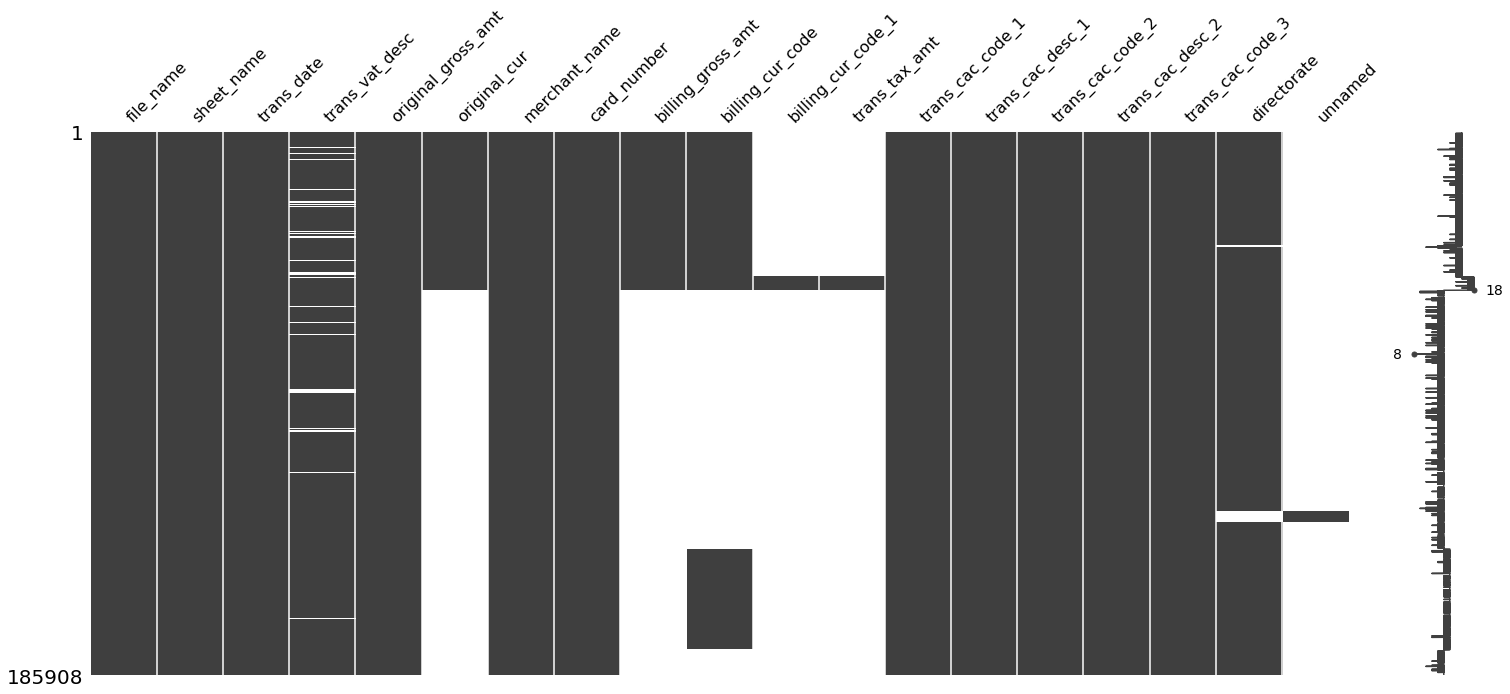

In [5]:
msno.matrix(df.sort_values(by=['file_name', 'sheet_name']))

In [6]:
col = 'original_cur'
print('-'*100 + f'\nColumn {col} have {df[col].isna().sum()/df.shape[0]:.1%} of null values:')
print(df[col].isna().value_counts().reset_index().replace({True:'Null',False:'Not Null'}))

col = 'billing_gross_amt'
print('-'*100 + f'\nColumn {col} have {df[col].isna().sum()/df.shape[0]:.1%} of null values:')
print(df[col].isna().value_counts().reset_index().replace({True:'Null',False:'Not Null'}))

col = 'billing_cur_code'
print('-'*100 + f'\nColumn {col} have {df[col].isna().sum()/df.shape[0]:.1%} of null values and only one class when is not null:')
print(df[col].value_counts(dropna=False))

col = 'billing_cur_code_1'
print('-'*100 + f'\nColumn {col} have {df[col].isna().sum()/df.shape[0]:.1%} of null values and only one class when is not null:')
print(df[col].value_counts(dropna=False))

col = 'trans_tax_amt'
print('-'*100 + f'\nColumn {col} have {df[col].isna().sum()/df.shape[0]:.1%} of null values:')
print(df[col].isna().value_counts().reset_index().replace({True:'Null',False:'Not Null'}))

----------------------------------------------------------------------------------------------------
Column original_cur have 70.8% of null values:
      index  original_cur
0      Null        131679
1  Not Null         54229
----------------------------------------------------------------------------------------------------
Column billing_gross_amt have 70.8% of null values:
      index  billing_gross_amt
0      Null             131679
1  Not Null              54229
----------------------------------------------------------------------------------------------------
Column billing_cur_code have 52.3% of null values and only one class when is not null:
NaN    97212
GBP    88696
Name: billing_cur_code, dtype: int64
----------------------------------------------------------------------------------------------------
Column billing_cur_code_1 have 97.5% of null values and only one class when is not null:
NaN    181310
GBP      4598
Name: billing_cur_code_1, dtype: int64
--------------------

In [7]:
print(f"Classes for the column directorate:\n{df['directorate'].value_counts(dropna=False)}")
print(f"\nClasses for the column unnamed:\n{df['unnamed'].value_counts(dropna=False)}")

Classes for the column directorate:
CYP&F SCHOOLS                   85612
Local Services                  41676
CYP&F                           23837
Corporate Resources             12205
Adult & Communities             12150
NaN                              4697
DEVELOPMENT                      3810
Adult Social Care and Health      564
CYP&F                             513
CYP&F Schools                     457
CYP&F                             127
CYO&F                              87
Adults & Comms                     50
Development                        41
Local services                     39
Adults                             24
Adults & Communities               16
Corporate Procurement               3
Name: directorate, dtype: int64

Classes for the column unnamed:
NaN                    181949
CYP&F SCHOOLS            1920
Local Services            716
CYP&F                     630
Corporate Resources       259
Adult & Communities       217
DEVELOPMENT               173
CYP&F

In [8]:
df['directorate_completed'] = df.apply(lambda x: x['unnamed'] if str(x['directorate'])=='nan' and str(x['unnamed'])!='nan' else x['directorate'], axis=1)
df['directorate_completed'].value_counts(dropna=False)

CYP&F SCHOOLS                   87532
Local Services                  42392
CYP&F                           24467
Corporate Resources             12464
Adult & Communities             12367
DEVELOPMENT                      3983
NaN                               738
Adult Social Care and Health      564
CYP&F                             548
CYP&F Schools                     459
CYP&F                             127
CYO&F                              93
Adults & Comms                     51
Development                        41
Local services                     39
Adults                             24
Adults & Communities               16
Corporate Procurement               3
Name: directorate_completed, dtype: int64

In [9]:
cols = ['unnamed', 'directorate', 'original_cur', 'billing_gross_amt', 'billing_cur_code', 'billing_cur_code_1', 'trans_tax_amt']
df.drop(columns=cols, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185908 entries, 0 to 185908
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   file_name              185908 non-null  object 
 1   sheet_name             185908 non-null  object 
 2   trans_date             185908 non-null  object 
 3   trans_vat_desc         176065 non-null  object 
 4   original_gross_amt     185908 non-null  float64
 5   merchant_name          185908 non-null  object 
 6   card_number            185908 non-null  object 
 7   trans_cac_code_1       185804 non-null  object 
 8   trans_cac_desc_1       185804 non-null  object 
 9   trans_cac_code_2       185673 non-null  object 
 10  trans_cac_desc_2       185673 non-null  object 
 11  trans_cac_code_3       185616 non-null  object 
 12  directorate_completed  185170 non-null  object 
dtypes: float64(1), object(12)
memory usage: 19.9+ MB


,file_name,sheet_name,trans_date,trans_vat_desc,original_gross_amt,merchant_name,card_number,trans_cac_code_1,trans_cac_desc_1,trans_cac_code_2,trans_cac_desc_2,trans_cac_code_3,directorate_completed
0,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-03,VR,72.61,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities
1,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-24,VR,85.51,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities
2,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-02-01,VR,10.09,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities
3,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-04,VR,20.00,mibsons service st,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities
4,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-05,VR,50.00,malthurst petroleu,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities


**Analisis**
1. Based on the comments above the columns original_cur, billing_gross_amt, billing_cur_code, billing_cur_code_1 and trans_tax_amt will be deleted from the dataframe.
2. Based on the nullity matrix and the cell above the columns **unnamed** and **directorate** will be deleted after is used to complete the **directorate_completed** column.
3. The column named **directorate_completed** have the **directorate** column completed with the column **unnamed**, and reduced the null values from 4697 to 738 (84.3% of reduction).

<AxesSubplot:>

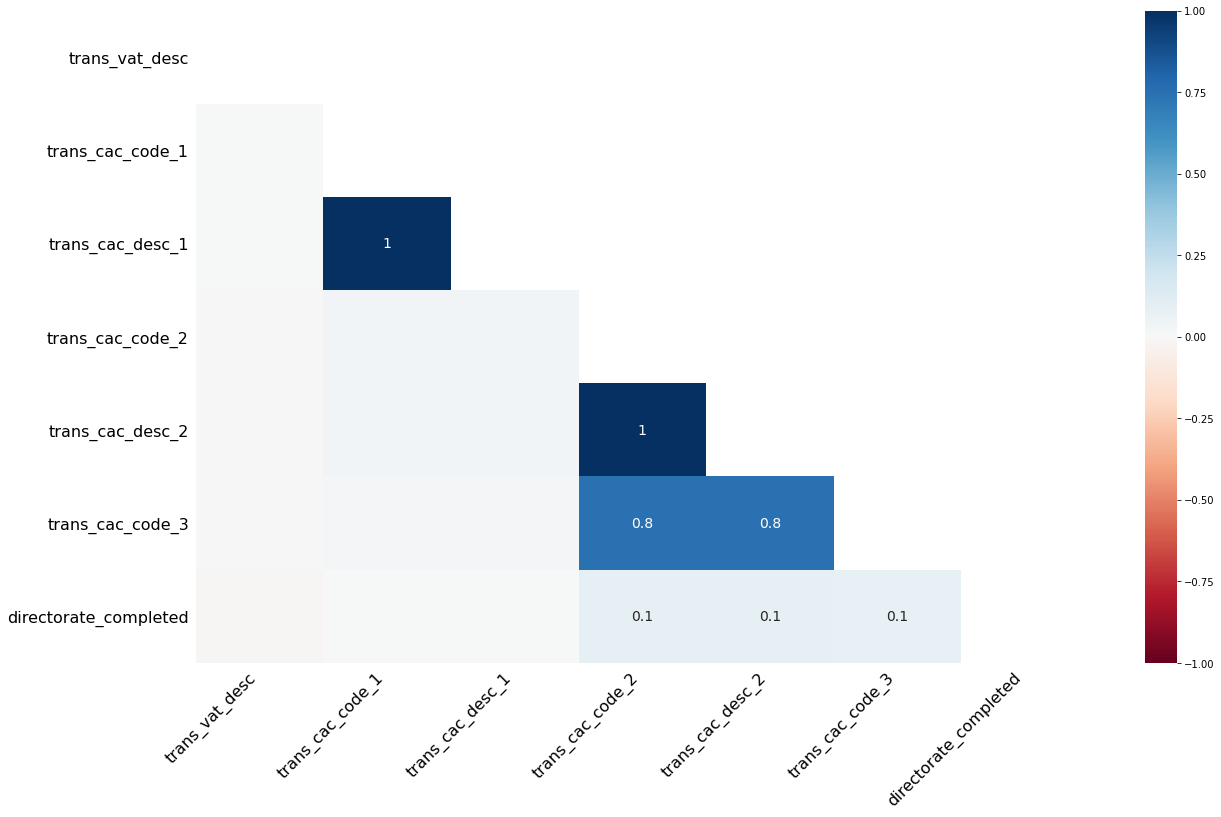

In [10]:
msno.heatmap(df.sort_values(by=['file_name', 'sheet_name']))

**Note**: The columns **trans_cac_code_1**, **trans_cac_desc_1**, **trans_cac_code_2**, **trans_cac_desc_2** have a strong correlation on the absence of variables, that could mean that are missing from the source of the data. To fix this columns we will going to use the mode to impute the classes.

In [32]:
df_to_impute = df.groupby(
    ['trans_cac_code_2', 'trans_cac_code_1'],
    as_index=False
)['sheet_name'].count().sort_values(by='sheet_name', ascending=False).drop_duplicates(subset='trans_cac_code_2').rename(columns={'sheet_name':'#'})

df_to_impute.head()

,trans_cac_code_2,trans_cac_code_1,#
6382,RJADC,N060,8383
8247,RUF0F,H0R0,6012
292,RBF40,K020,1374
8437,RV014,L0J0,1299
1163,REAAB,L220,1204


In [59]:
df['trans_cac_code_1_to_impute'] = pd.merge(
    left = df,
    right = df_to_impute,
    how = 'left',
    on = 'trans_cac_code_2',
    indicator = 'cruce'
)['trans_cac_code_1_y']

df['trans_cac_code_1_imputed'] = df.apply(lambda x: x['trans_cac_code_1_to_impute'] if str(x['trans_cac_code_1'])=='nan' else x['trans_cac_code_1'], axis=1)

tdf = df.groupby(['trans_cac_code_1', 'trans_cac_desc_1'], as_index=False)['file_name'].count().iloc[:,:-1]
df['trans_cac_desc_1_to_impute'] = pd.merge(
    left = df,
    right = tdf,
    how = 'left',
    left_on = 'trans_cac_code_1_imputed',
    right_on = 'trans_cac_code_1',
    indicator = 'cruce'
)['trans_cac_desc_1_y']

df['trans_cac_desc_1_imputed'] = df.apply(lambda x: x['trans_cac_desc_1_to_impute'] if str(x['trans_cac_desc_1'])=='nan' else x['trans_cac_desc_1'], axis=1)

In [61]:
df_to_impute = df.groupby(
    ['trans_cac_code_2', 'trans_cac_code_3'],
    as_index=False
)['sheet_name'].count().sort_values(by='sheet_name', ascending=False).drop_duplicates(subset='trans_cac_code_2').rename(columns={'sheet_name':'#'})

df_to_impute.head()

,trans_cac_code_2,trans_cac_code_3,#
1013,RUF0F,A00,13839
667,RJADC,A00,8558
229,REAAB,A00,5057
1030,RV014,A00,3121
724,RLBMC,A00,2596


In [ ]:
df['trans_cac_code_1_to_impute'] = pd.merge(
    left = df,
    right = df_to_impute,
    how = 'left',
    on = 'trans_cac_code_2',
    indicator = 'cruce'
)['trans_cac_code_1_y']

df['trans_cac_code_1_imputed'] = df.apply(lambda x: x['trans_cac_code_1_to_impute'] if str(x['trans_cac_code_1'])=='nan' else x['trans_cac_code_1'], axis=1)

In [60]:
df.isna().sum()

file_name                        0
sheet_name                       0
trans_date                       0
trans_vat_desc                9843
original_gross_amt               0
merchant_name                    0
card_number                      0
trans_cac_code_1               104
trans_cac_desc_1               104
trans_cac_code_2               235
trans_cac_desc_2               235
trans_cac_code_3               292
directorate_completed          738
trans_cac_code_1_to_impute     236
trans_cac_code_1_imputed         5
trans_cac_desc_1_to_impute       6
trans_cac_desc_1_imputed         5
dtype: int64

In [56]:
tdf = df.groupby(['trans_cac_code_1', 'trans_cac_desc_1'], as_index=False)['file_name'].count().iloc[:,:-1]
tdf[tdf['trans_cac_code_1']=='L220']

,trans_cac_code_1,trans_cac_desc_1
77,L220,Purchases Food


In [55]:
df[df['trans_cac_desc_1_imputed'].isna()]

,file_name,sheet_name,trans_date,trans_vat_desc,original_gross_amt,merchant_name,card_number,trans_cac_code_1,trans_cac_desc_1,trans_cac_code_2,trans_cac_desc_2,trans_cac_code_3,directorate_completed,trans_cac_code_1_to_impute,trans_cac_code_1_imputed,trans_cac_desc_1_to_impute,trans_cac_desc_1_imputed
3826,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-20,VZ,24.90,amazon uk marketplace,************0511,NaN,NaN,REAYH,Mayfield,A00,CYP&F SCHOOLS,L220,L220,NaN,NaN
3827,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-20,VZ,29.98,amazon uk marketplace,************0511,NaN,NaN,REAYH,Mayfield,A00,CYP&F SCHOOLS,L220,L220,NaN,NaN
3828,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-23,VZ,8.20,amazon uk marketplace,************0511,NaN,NaN,REAYH,Mayfield,A00,CYP&F SCHOOLS,L220,L220,NaN,NaN
6092,cusersfinainmndesktoppublish-spend-april-2017.xls,Sheet1,2017-04-27,VR,36.00,peacock stores ltd,************0990,NaN,NaN,NaN,NaN,A00,CYP&F,NaN,NaN,NaN,NaN
8924,cusersfinainmndesktoppublish-spend-august-2017...,Sheet1,2017-08-16,VR,6.25,ikea limited,************6964,NaN,NaN,RV013,"Warwick Hse HLDC, 938 Warwick Rd B27",A00,CYP&F,L220,L220,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134623,publishspendpurchasecardsmarch.xls,Sheet1,2015-03-16,VR,207.48,dunelm (soft furnishin,************6964,NaN,NaN,RV013,"Warwick Hse HLDC, 938 Warwick Rd B27",A00,CYP&F,L220,L220,NaN,NaN
134624,publishspendpurchasecardsmarch.xls,Sheet1,2015-03-28,VR,81.04,acocks green 224,************6964,NaN,NaN,RV013,"Warwick Hse HLDC, 938 Warwick Rd B27",A00,CYP&F,L220,L220,NaN,NaN
134625,publishspendpurchasecardsmarch.xls,Sheet1,2015-03-29,VR,74.95,west midlands safari park,************6964,NaN,NaN,RV013,"Warwick Hse HLDC, 938 Warwick Rd B27",A00,CYP&F,L220,L220,NaN,NaN
134626,publishspendpurchasecardsmarch.xls,Sheet1,2015-03-29,VR,14.35,mcdonalds,************6964,NaN,NaN,RV013,"Warwick Hse HLDC, 938 Warwick Rd B27",A00,CYP&F,L220,L220,NaN,NaN


In [49]:
df[df['trans_cac_desc_1_imputed'].isna()]

,file_name,sheet_name,trans_date,trans_vat_desc,original_gross_amt,merchant_name,card_number,trans_cac_code_1,trans_cac_desc_1,trans_cac_code_2,trans_cac_desc_2,trans_cac_code_3,directorate_completed,trans_cac_code_1_to_impute,trans_cac_code_1_imputed,trans_cac_desc_1_to_impute,trans_cac_desc_1_imputed
3826,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-20,VZ,24.90,amazon uk marketplace,************0511,NaN,NaN,REAYH,Mayfield,A00,CYP&F SCHOOLS,L220,L220,NaN,NaN
3827,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-20,VZ,29.98,amazon uk marketplace,************0511,NaN,NaN,REAYH,Mayfield,A00,CYP&F SCHOOLS,L220,L220,NaN,NaN
3828,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-23,VZ,8.20,amazon uk marketplace,************0511,NaN,NaN,REAYH,Mayfield,A00,CYP&F SCHOOLS,L220,L220,NaN,NaN
6092,cusersfinainmndesktoppublish-spend-april-2017.xls,Sheet1,2017-04-27,VR,36.00,peacock stores ltd,************0990,NaN,NaN,NaN,NaN,A00,CYP&F,NaN,NaN,NaN,NaN
8924,cusersfinainmndesktoppublish-spend-august-2017...,Sheet1,2017-08-16,VR,6.25,ikea limited,************6964,NaN,NaN,RV013,"Warwick Hse HLDC, 938 Warwick Rd B27",A00,CYP&F,L220,L220,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134623,publishspendpurchasecardsmarch.xls,Sheet1,2015-03-16,VR,207.48,dunelm (soft furnishin,************6964,NaN,NaN,RV013,"Warwick Hse HLDC, 938 Warwick Rd B27",A00,CYP&F,L220,L220,NaN,NaN
134624,publishspendpurchasecardsmarch.xls,Sheet1,2015-03-28,VR,81.04,acocks green 224,************6964,NaN,NaN,RV013,"Warwick Hse HLDC, 938 Warwick Rd B27",A00,CYP&F,L220,L220,NaN,NaN
134625,publishspendpurchasecardsmarch.xls,Sheet1,2015-03-29,VR,74.95,west midlands safari park,************6964,NaN,NaN,RV013,"Warwick Hse HLDC, 938 Warwick Rd B27",A00,CYP&F,L220,L220,NaN,NaN
134626,publishspendpurchasecardsmarch.xls,Sheet1,2015-03-29,VR,14.35,mcdonalds,************6964,NaN,NaN,RV013,"Warwick Hse HLDC, 938 Warwick Rd B27",A00,CYP&F,L220,L220,NaN,NaN


Column: **trans_date**

In [ ]:
print(df['trans_vat_desc'].value_counts(dropna=False))
df[df['trans_vat_desc'].isna()]

**Analisis**:
1. **trans_date**: One null value that is null in all columns. (will be deleted from dataset)
2. **trans_vat_desc**: ----
3. **original_gross_amt**: idem as **trans_date**
4. **original_cur**: ----
5. **merchant_name**: idem as **trans_date**
6. **card_number**: idem as **trans_date**
7. **billing_gross_amt**: ----
8. **billing_cur_code**: ----
9. **billing_cur_code_1**: ----
10. **trans_tax_amt**: ----
11. **trans_cac_code_1**: ----
12. **trans_cac_desc_1**: ----
13. **trans_cac_code_2**: ----
14. **trans_cac_desc_2**: ----
15. **trans_cac_code_3**: ----
16. **directorate**: ----
17. **unnamed**: ----

In [ ]:
df[df['trans_date'].isna()]

**Column**: trans_vat_desc

**Note**: Row in index number 59942 is a null in all variables, it will be deletd.

___________
### Review duplicated data (complete row)

In [ ]:
f, ax = plt.subplots(1,1,figsize=(10,5))

dup_df = df.duplicated(keep='first').value_counts(dropna=False).reset_index().rename(columns={'index':'duplicated',0:'#'})
dup_df['%'] = dup_df['#'].apply(lambda x: f'{x/dup_df["#"].sum():.1%}')

pie = ax.pie(dup_df['#'], labels=dup_df['duplicated'])

dup_df

**Note**:
1. The full dataset have 185.909 rows.
2. There are 4.983 (2.7%) duplicated rows from the full data set.

### ¿How many times the same row can be duplicated?

In [ ]:
df['row_indicator'] = 1
getstats(df.fillna(0).groupby(list(df.columns)[:-1], as_index=False)[list(df.columns)[-1:]].sum()['row_indicator'].tolist(), varname='duplicates', graphtitle=f'frecuency of duplicates')
df.fillna(0).groupby(list(df.columns)[:-1], as_index=False)[list(df.columns)[-1:]].count()['row_indicator'].value_counts(dropna=False)

**Note**: Understanding that a row represents one transaction made by a client of a merchant (***merchant_name***) with a credit card (***card_number***), and seeing that a row can be duplicated from two to thirty nine times, i decided to delete the duplicated rows from the dataset.

In [ ]:
df.head()